<br/>

## <div style="padding:10px;background-color:#9d5a47;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 10px;overflow:hidden;font-weight:50;width:auto">LearningFuze Classification Workbook</div>

Data Source: https://github.com/IBM/telco-customer-churn-on-icp4d

In [1]:
from IPython.display import Markdown, display

import pandas as pd
import numpy as np
np.random.seed(42)
rng = np.random.default_rng(42)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

from pathlib import Path
data_path = Path('.')

from helper_functions import *

BALANCE_TARGET = True

# Data  Ingestion

In [2]:
df = pd.read_csv(data_path / "Telco-Customer-Churn.csv")
df.sample(8)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No
1263,6818-WOBHJ,Female,1,Yes,No,68,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),89.60,6127.6,Yes
3732,3082-YVEKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),77.15,1759.4,No
1672,4737-AQCPU,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Credit card (automatic),72.10,5016.65,No


# EDA

## Basic Statistics

In [3]:
display(Markdown("### INFO"))
display(df.info())
display(Markdown("### Description"))
display(df.describe())

### INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

### Description

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
# return a list of columns that only have "Yes" or "No" as values
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [5]:
# df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0})
# df.sample(8)

In [6]:
# check if  there are duplicates in customerID
df.duplicated(subset=["customerID"]).sum()

np.int64(0)

In [7]:
# drop customerID
df.drop(columns=["customerID"], inplace=True, errors="ignore")
df.sample(8)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5407,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,No
2336,Male,0,Yes,No,17,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),70.40,1214.05,Yes
5063,Male,0,No,No,21,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,82.35,1852.85,Yes
1516,Female,0,Yes,No,17,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,92.60,1579.7,No
1869,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
2201,Female,0,No,No,36,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),85.85,3003.55,No
6985,Male,0,Yes,Yes,37,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Yes,Electronic check,40.20,1525.35,No
218,Male,0,Yes,Yes,65,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),84.20,5324.5,No


In [8]:
for col in df.columns.drop(["TotalCharges", "MonthlyCharges", "tenure"]):
    print(df.value_counts(col), "\n", f"Num Unique: {df[col].nunique()}", "\n\n")

gender
Male      3555
Female    3488
Name: count, dtype: int64 
 Num Unique: 2 


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64 
 Num Unique: 2 


Partner
No     3641
Yes    3402
Name: count, dtype: int64 
 Num Unique: 2 


Dependents
No     4933
Yes    2110
Name: count, dtype: int64 
 Num Unique: 2 


PhoneService
Yes    6361
No      682
Name: count, dtype: int64 
 Num Unique: 2 


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64 
 Num Unique: 3 


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64 
 Num Unique: 3 


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64 
 Num Unique: 3 


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64 
 Num Unique: 3 


DeviceProtection
No                     3095
Yes           

## Distribution of Target Variable

<Axes: xlabel='Churn', ylabel='count'>

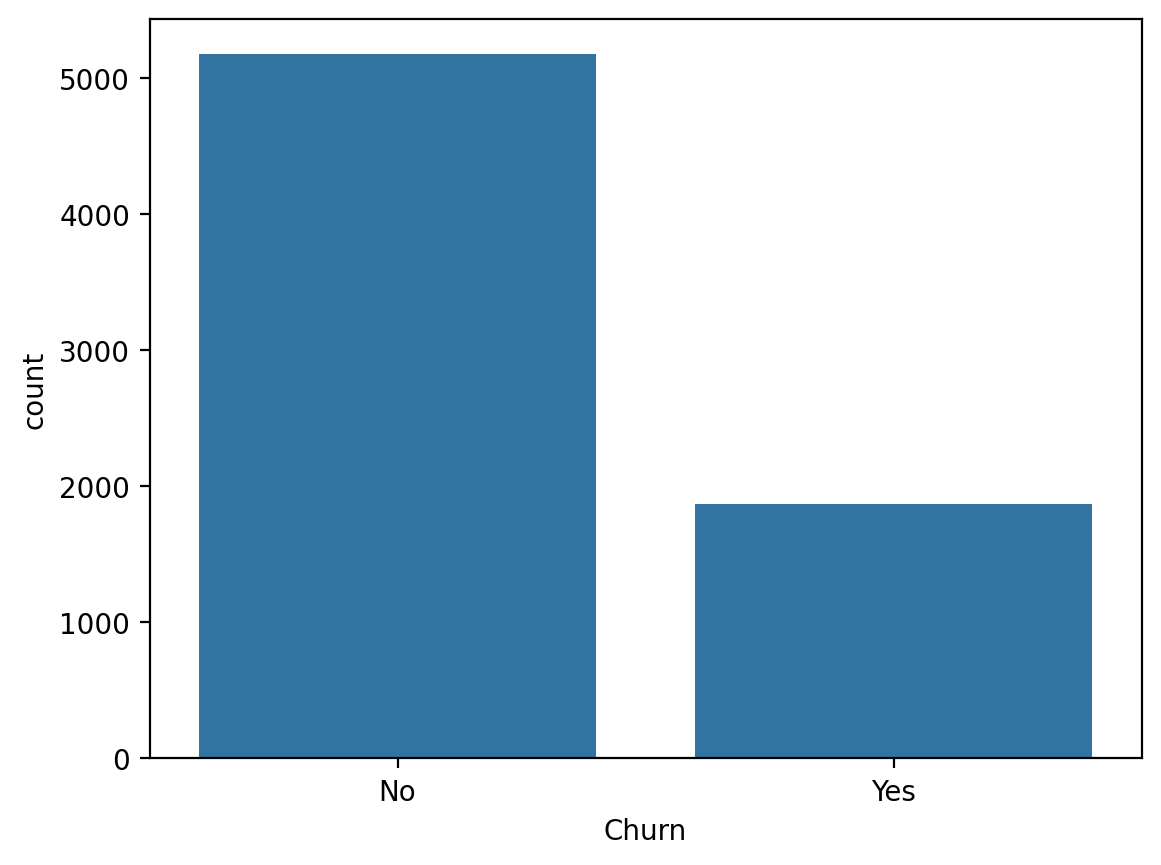

In [9]:
# graph the balance of the target variable
sns.countplot(data=df, x="Churn")

## Distibution of the Features

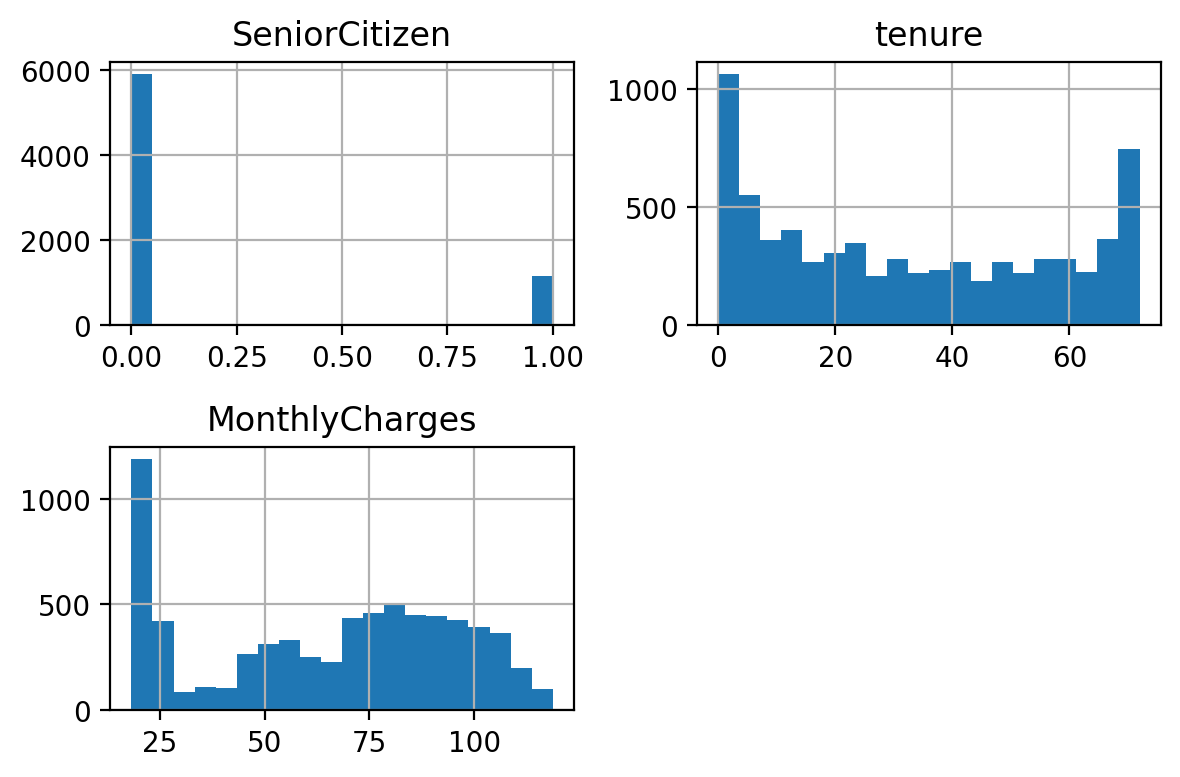

In [10]:
df.drop(columns=["Churn"], errors="ignore").hist(figsize=(6, 4), bins=20)
plt.tight_layout()
plt.show()

# Data Cleaning

In [11]:
# encode categorical columns
cat_cols = df.drop(columns="Churn").select_dtypes(include="object").columns.tolist()
cat_cols.append("SeniorCitizen")  # SeniorCitizen is a binary column
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'SeniorCitizen']

### Fix `df.TotalCharges`

In [12]:
# whoops TotalCharges is an object??
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
df[df.TotalCharges == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
# convert to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
print(f"Number of Nulls in Total Charges: {df.TotalCharges.isna().sum()}")

Number of Nulls in Total Charges: 11


In [15]:
# inspect the rows with missing TotalCharges
df[df.TotalCharges.isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [16]:
# drop the nans
df.dropna(subset=["TotalCharges"], inplace=True)

In [17]:
cat_cols.remove("TotalCharges")
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

# Retrieve the numerical columns

In [18]:
# get the numeric columns by inverting the cat cols
num_cols = df.drop(columns=cat_cols + ["Churn"]).columns.tolist()
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

### Get another look at the numerical columns

In [19]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


 ## Check the categoricals - how do we want to encode them?
 

In [20]:
df[cat_cols].nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
SeniorCitizen       2
dtype: int64

In [21]:
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]
binary_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'SeniorCitizen']

In [22]:
df["SeniorCitizen"] = df["SeniorCitizen"].replace({0: "No", 1: "Yes"})

In [23]:
other_cat_cols = [col for col in cat_cols if col not in binary_cols]

In [24]:
for col in other_cat_cols:
    print(df[col].value_counts(), "\n\n")

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64 


InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64 


OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64 


OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64 


DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64 


TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64 


StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64 


StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64 


Contract
Month

In [25]:
# dictionary of columns and their ordered values
ordinal_dict = {
    "MultipleLines": ["No phone service", "No", "Yes"],
    "InternetService": ["No", "DSL", "Fiber optic"],
    "OnlineSecurity": ["No internet service", "No", "Yes"],
    "OnlineBackup": ["No internet service", "No", "Yes"],
    "DeviceProtection": ["No internet service", "No", "Yes"],
    "TechSupport": ["No internet service", "No", "Yes"],
    "StreamingTV": ["No internet service", "No", "Yes"],
    "StreamingMovies": ["No internet service", "No", "Yes"],
    "Contract": ["Month-to-month", "One year", "Two year"],
}

# like one-hot, but we control the values as we drop the first
binary_ordinal_dict = {
    "SeniorCitizen": ["No", "Yes"],
    "PaperlessBilling": ["No", "Yes"],
    "Partner": ["No", "Yes"],
    "Dependents": ["No", "Yes"],
    "PhoneService": ["No", "Yes"],
}


one_hot_list = ["PaymentMethod", "gender"]

# Split the Data

In [26]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [27]:
# standardize the numeric columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [28]:
{**ordinal_dict, **binary_ordinal_dict}

{'MultipleLines': ['No phone service', 'No', 'Yes'],
 'InternetService': ['No', 'DSL', 'Fiber optic'],
 'OnlineSecurity': ['No internet service', 'No', 'Yes'],
 'OnlineBackup': ['No internet service', 'No', 'Yes'],
 'DeviceProtection': ['No internet service', 'No', 'Yes'],
 'TechSupport': ['No internet service', 'No', 'Yes'],
 'StreamingTV': ['No internet service', 'No', 'Yes'],
 'StreamingMovies': ['No internet service', 'No', 'Yes'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'SeniorCitizen': ['No', 'Yes'],
 'PaperlessBilling': ['No', 'Yes'],
 'Partner': ['No', 'Yes'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes']}

In [29]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1413,Male,No,Yes,Yes,1.321816,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),0.981556,1.659900
7003,Male,No,No,No,-0.267410,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,-0.971546,-0.562252
3355,Female,No,Yes,No,1.444064,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),0.837066,1.756104
4494,Male,No,No,No,-1.204646,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,0.641092,-0.908326
3541,Female,No,Yes,No,0.669826,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),-0.808787,-0.101561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,Male,Yes,Yes,No,1.321816,Yes,No,Fiber optic,No,No,No,No,No,No,One year,Yes,Bank transfer (automatic),0.197658,0.990321
5123,Female,Yes,No,No,-0.715654,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0.342148,-0.507338
4135,Female,No,Yes,Yes,0.140084,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0.926749,0.473507
4249,Female,No,Yes,Yes,-0.919401,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,0.029917,-0.721544


In [30]:
# use one-hot encoding from scikit learn
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

ONE_HOT_EVERYTHING = True
enc_1h = OneHotEncoder(drop="first", sparse_output=False).set_output(transform="pandas")

if ONE_HOT_EVERYTHING:
    # naively one-hot encode everything. This is not the best approach,
    # but at least the features have low cardinality
    # some may be better encoded as ordinal
    X_train = X_train.drop(columns=cat_cols).join(
        enc_1h.fit_transform(X_train[cat_cols])
    )
    X_test = X_test.drop(columns=cat_cols).join(enc_1h.transform(X_test[cat_cols]))

else:
    # one-hot encode
    X_train = X_train.drop(columns=one_hot_list).join(
        enc_1h.fit_transform(X_train[one_hot_list])
    )
    X_test = X_test.drop(columns=one_hot_list).join(
        enc_1h.transform(X_test[one_hot_list])
    )

    # ordinal encode
    all_ord_dict = {**ordinal_dict, **binary_ordinal_dict}
    enc_ord = OrdinalEncoder(
        categories=[all_ord_dict[col] for col in all_ord_dict]
    ).set_output(transform="pandas")

    X_train = X_train.drop(columns=all_ord_dict.keys()).join(
        enc_ord.fit_transform(X_train[all_ord_dict.keys()])
    )
    X_test = X_test.drop(columns=all_ord_dict.keys()).join(
        enc_ord.transform(X_test[all_ord_dict.keys()])
    )

X_train

,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_Yes
1413,1.321816,0.981556,1.659900,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7003,-0.267410,-0.971546,-0.562252,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3355,1.444064,0.837066,1.756104,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4494,-1.204646,0.641092,-0.908326,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3541,0.669826,-0.808787,-0.101561,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,1.321816,0.197658,0.990321,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5123,-0.715654,0.342148,-0.507338,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4135,0.140084,0.926749,0.473507,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4249,-0.919401,0.029917,-0.721544,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


# Balance the Data in the training set

<Axes: xlabel='Churn', ylabel='count'>

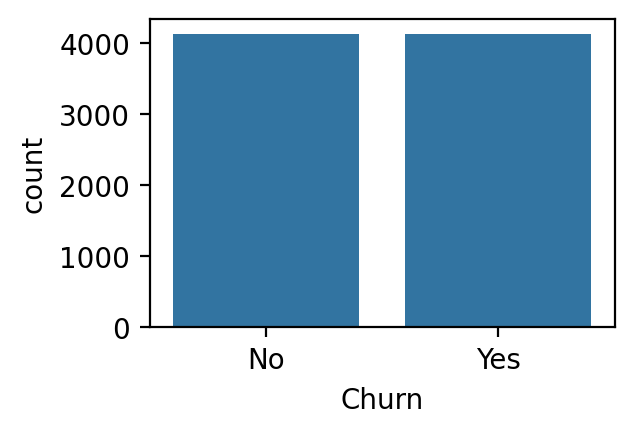

In [31]:
BALANCE_TARGET = True
SMOTE_BALANCE = True

if BALANCE_TARGET:
    if SMOTE_BALANCE:
        # use smote to balance the target variable
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)
    else:
        # undersample the majority class
        undersampler = RandomUnderSampler(random_state=42)
        X_train, y_train = undersampler.fit_resample(X_train, y_train)


plt.figure(figsize=(3, 2))
sns.countplot(y_train.to_frame(), x="Churn")

In [32]:
y_train.value_counts(normalize=True)

Churn
No     0.5
Yes    0.5
Name: proportion, dtype: float64

In [33]:
# run logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.90      0.72      0.80      1033
         Yes       0.50      0.78      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.75      1407



In [34]:
# run random forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.85      0.84      0.84      1033
         Yes       0.57      0.58      0.58       374

    accuracy                           0.77      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



In [35]:
# recall the original target balance as percentage
y.value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

### Plot the Confusion Matrix - Look at those False Positives!

Go back and look at the Precision

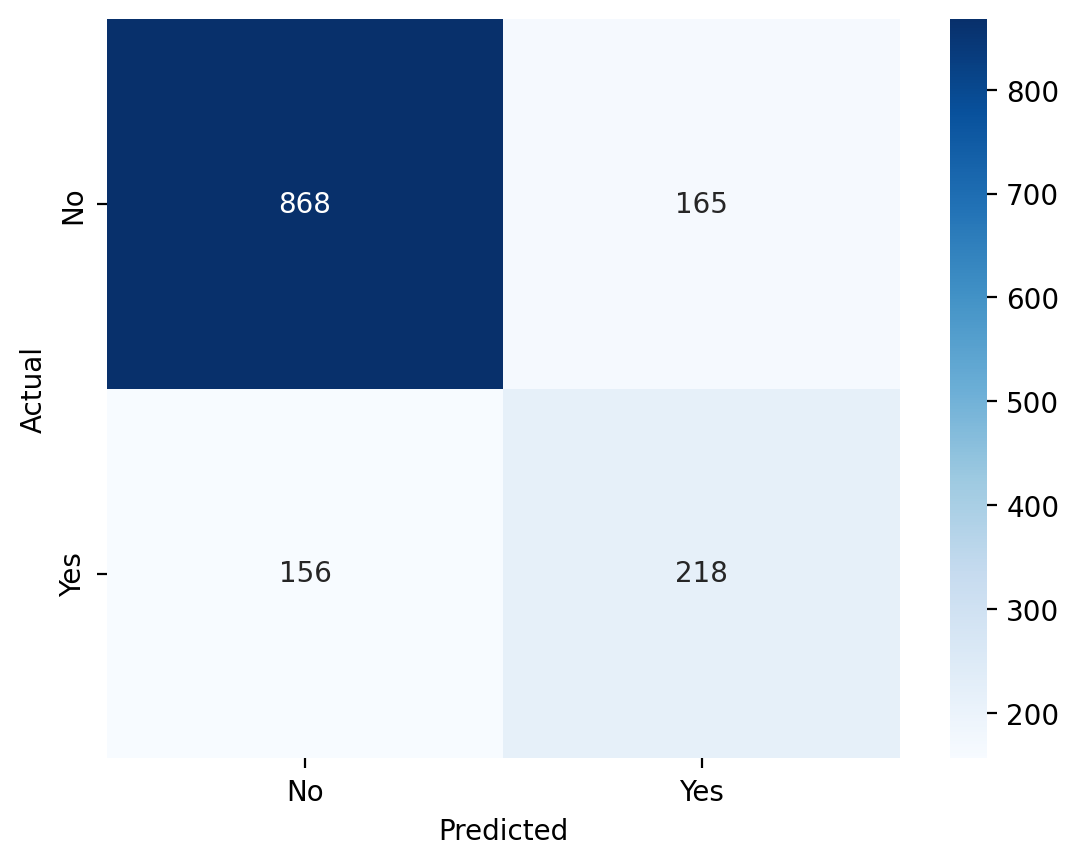

In [36]:
#  show confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=["No", "Yes"],
    yticklabels=["No", "Yes"],
    cmap="Blues",
)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

In [37]:
# run a grid search on the random forest
param_grid = {
    # "n_estimators": [10, 50, 100, 200],
    # "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

rf_model = grid_train_random_forest(X_train, y_train, param_grid, 4, 'accuracy')

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.85      0.84      0.84      1033
         Yes       0.57      0.58      0.58       374

    accuracy                           0.77      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



### Observe ROC Curve

ROC AUC Score: 0.8151275294945929


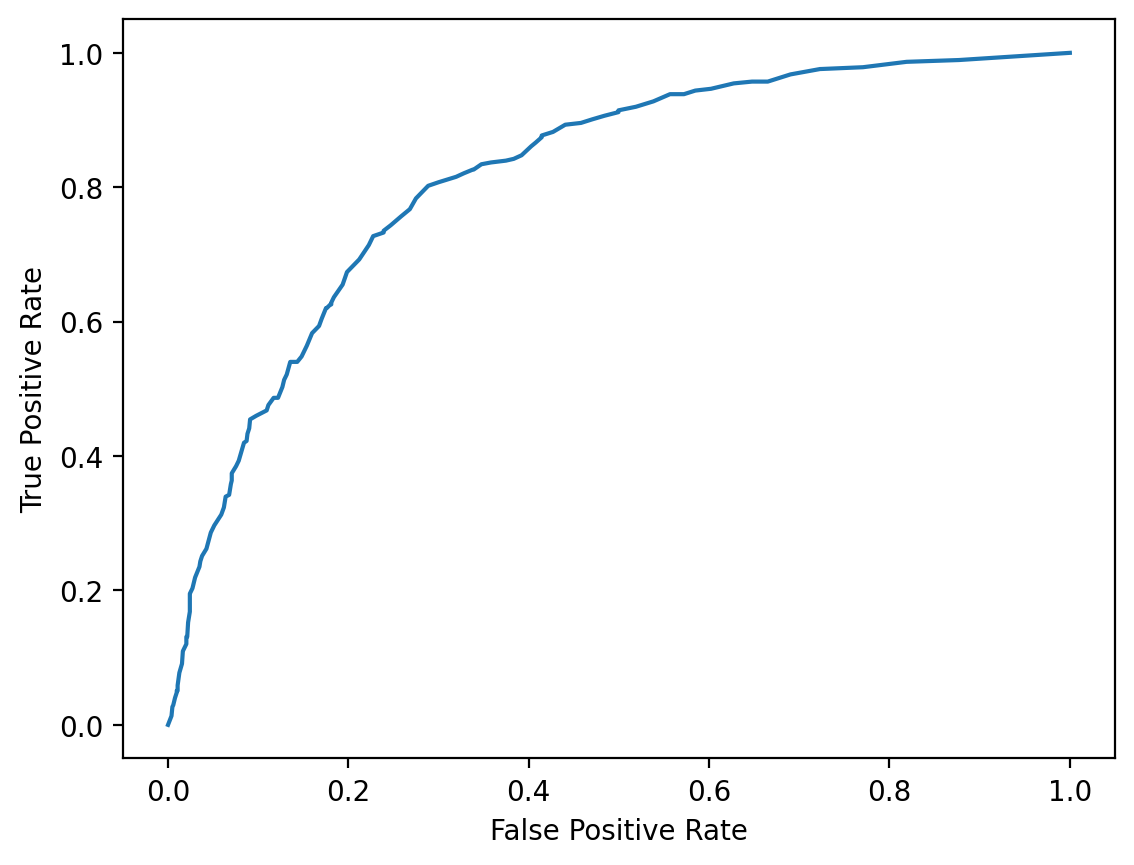

In [38]:
fpr, tpr, auc = calc_roc_metrics(X_test, y_test, model)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
print("ROC AUC Score:", auc)

## Using XGBoost

May need to install xgboost package.

In [39]:
#!pip install xgboost

Train XGBoost model using the following parameters:

In [40]:
# Set up parameters
param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic'}
param['nthread'] = -1
param['eval_metric'] = 'auc'

# Train model
xgb_model = train_xgboost(X_train, y_train, X_test, y_test, param, n_round=10)

[0]	validation_0-auc:0.72621
[1]	validation_0-auc:0.81027
[2]	validation_0-auc:0.82050
[3]	validation_0-auc:0.82054
[4]	validation_0-auc:0.81853
[5]	validation_0-auc:0.82043
[6]	validation_0-auc:0.82349
[7]	validation_0-auc:0.82632
[8]	validation_0-auc:0.82821
[9]	validation_0-auc:0.82666


We get a highest AUC score of 0.82853 for the evaluation data. This is slightly higher than that of the best random forest model based on grid search cross validation (0.81430).